# Implementation of Lasso, Ridge and Elastic Net

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\Anurag\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Anurag\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Loading Pre-defined Boston Data-set

In [3]:
boston_dataset = datasets.load_boston()
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

# Generate scatter plot of independent vs Dependent variable

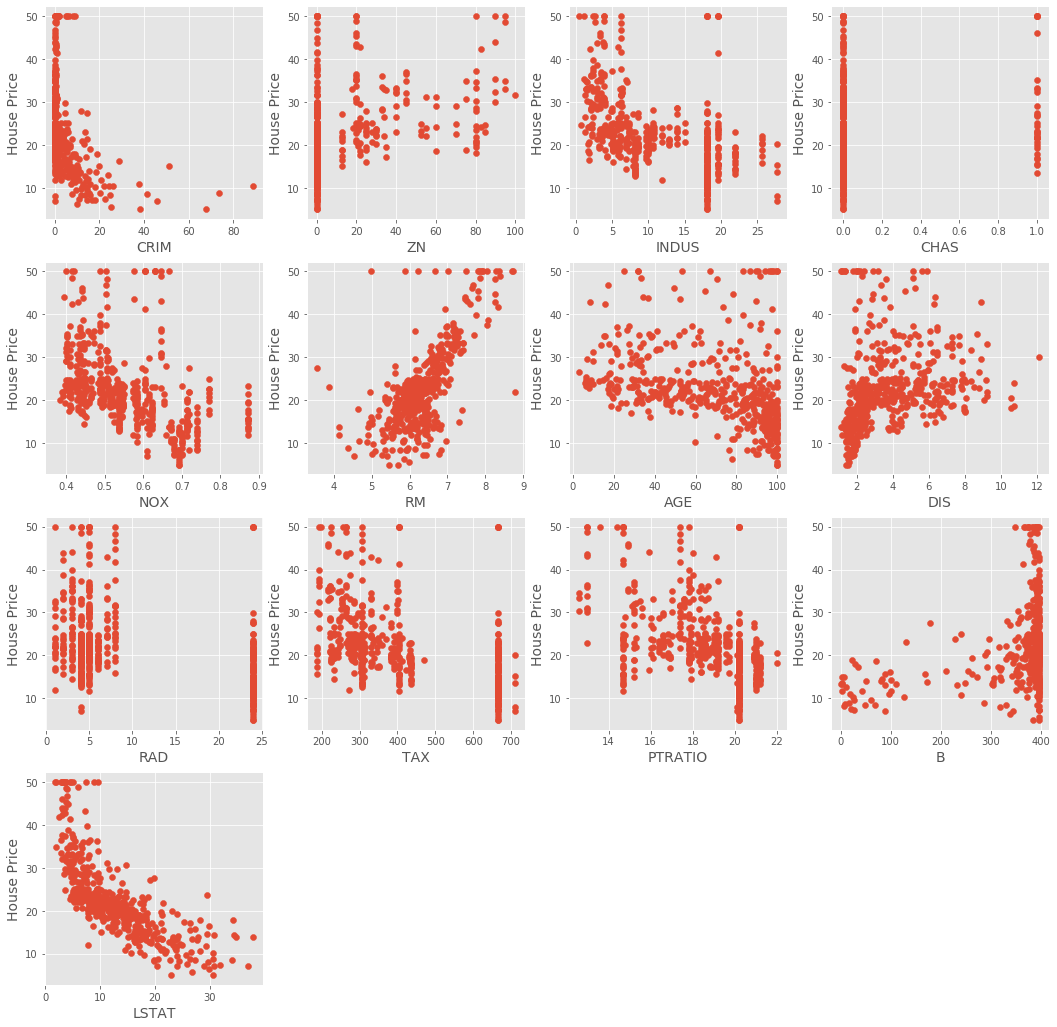

In [4]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,18))

for index,feature_name in enumerate(boston_dataset.feature_names):
    ax = fig.add_subplot(4, 4, index+1)
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
    ax.set_ylabel('House Price', size = 14)
    ax.set_xlabel(feature_name, size = 14)
    
plt.show()

# Load the dataset into Pandas Dataframe

In [5]:
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

X = boston_pd.iloc[:, :-1]
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [8]:
print("Train data shape of X = % s and Y = % s : "%(X_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(X_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


# Linear Regression Model

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

In [11]:
mean_squared_error = np.mean((lr_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  33.954012148975


In [13]:
lr_coefficient = pd.DataFrame()
lr_coefficient['Columns'] = X_train.columns
lr_coefficient['Coefficient Estimate'] = pd.Series(lr.coef_)
print(lr_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.076685
1        ZN              0.039511
2     INDUS              0.014635
3      CHAS              2.390892
4       NOX            -17.067350
5        RM              4.939290
6       AGE             -0.015629
7       DIS             -1.432589
8       RAD              0.205776
9       TAX             -0.011273
10  PTRATIO             -0.911569
11        B              0.009719
12    LSTAT             -0.372284


# Plotting the coefficient score

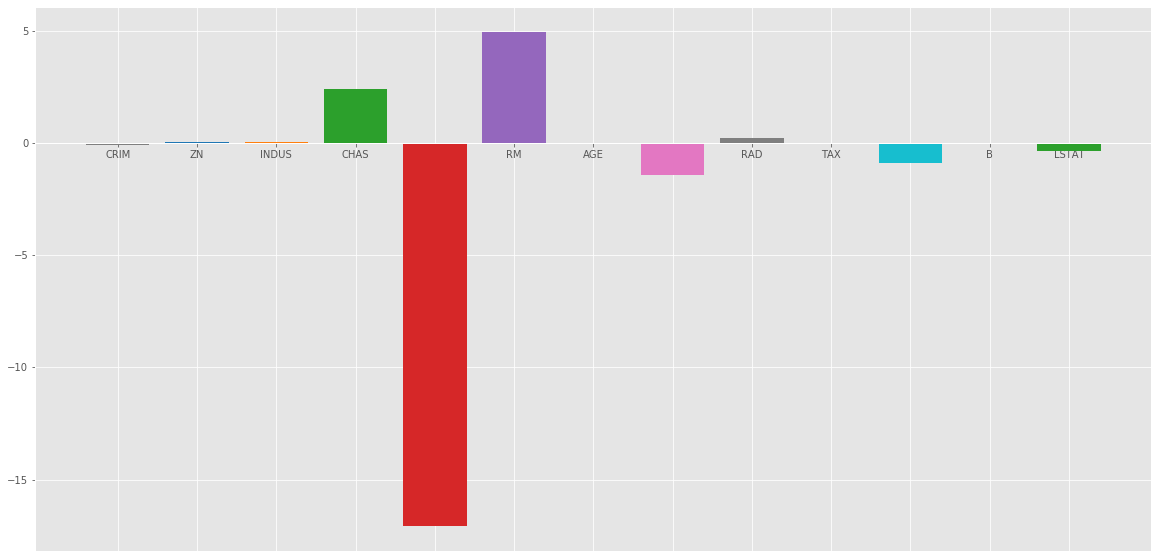

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lr_coefficient['Columns'], lr_coefficient['Coefficient Estimate'], color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

# Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, y_train)
ridgeR_y_pred = ridgeR.predict(X_test)

mean_squared_error_ridge = np.mean((ridgeR_y_pred - y_test)**2)
print(mean_squared_error_ridge)

ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

34.26455338620854
    Columns  Coefficient Estimate
0      CRIM             -0.072508
1        ZN              0.040078
2     INDUS             -0.017051
3      CHAS              2.217494
4       NOX             -9.292617
5        RM              5.014428
6       AGE             -0.023186
7       DIS             -1.310342
8       RAD              0.191359
9       TAX             -0.012052
10  PTRATIO             -0.820486
11        B              0.010367
12    LSTAT             -0.378981


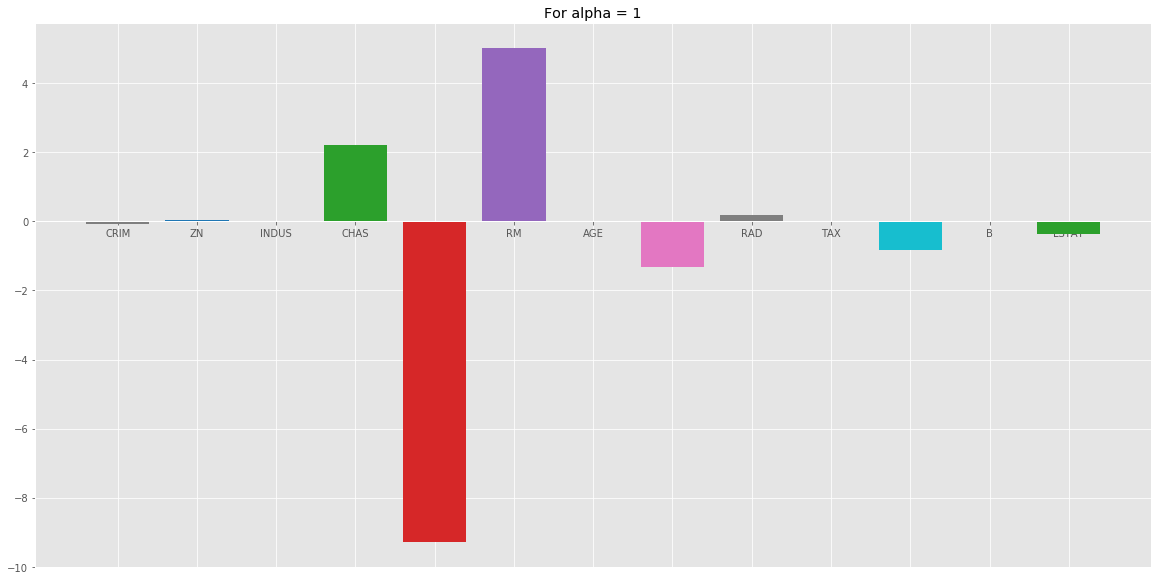

In [17]:
fig, ax = plt.subplots(figsize=(20,10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient['Columns'], ridge_coefficient['Coefficient Estimate'], color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.title('For alpha = 1')
plt.show()

#### ***Notice that the above graphs can be misleading in a way that it shows some of the coefficients become zero. In Ridge Regularization, the coefficients can never be 0, they are just too small to observe in above plots.***

In [18]:
ridgeR1 = Ridge(alpha = 10)
ridgeR1.fit(X_train, y_train)
ridgeR1_y_pred = ridgeR1.predict(X_test)

mean_squared_error_ridge1 = np.mean((ridgeR1_y_pred - y_test)**2)
print(mean_squared_error_ridge1)

ridge_coefficient1 = pd.DataFrame()
ridge_coefficient1["Columns"]= X_train.columns
ridge_coefficient1['Coefficient Estimate'] = pd.Series(ridgeR1.coef_)
print(ridge_coefficient1)

33.882336745500425
    Columns  Coefficient Estimate
0      CRIM             -0.071623
1        ZN              0.042846
2     INDUS             -0.051659
3      CHAS              1.589630
4       NOX             -1.848691
5        RM              4.630890
6       AGE             -0.026302
7       DIS             -1.206327
8       RAD              0.194838
9       TAX             -0.013424
10  PTRATIO             -0.753980
11        B              0.010813
12    LSTAT             -0.419227


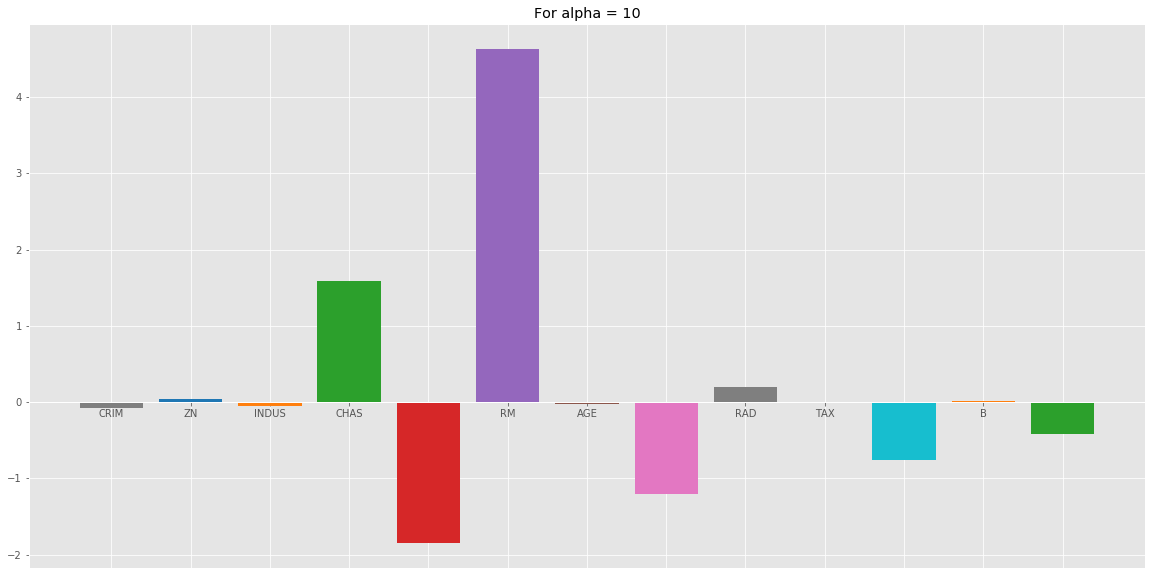

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient1['Columns'], ridge_coefficient1['Coefficient Estimate'], color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.title('For alpha = 10')
plt.show()

# Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mean_squared_error = np.mean((y_pred_lasso - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

Mean squared error on test set 33.74056410679621
    Columns  Coefficient Estimate
0      CRIM             -0.035326
1        ZN              0.043635
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.494494
6       AGE              0.009602
7       DIS             -0.647351
8       RAD              0.210327
9       TAX             -0.015541
10  PTRATIO             -0.692577
11        B              0.009362
12    LSTAT             -0.663784


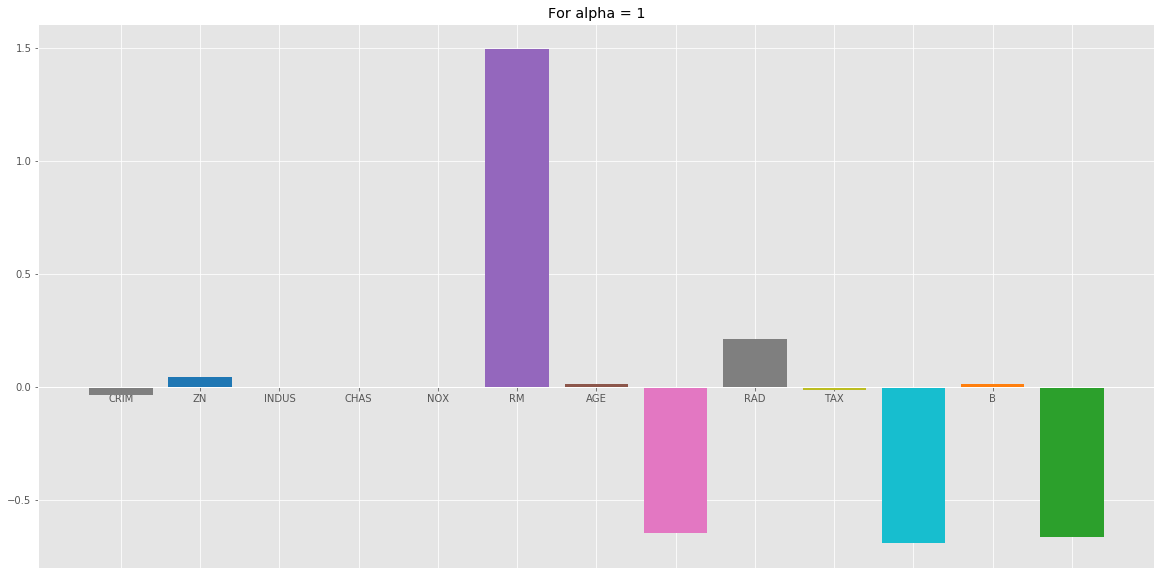

In [24]:
fig, ax = plt.subplots(figsize=(20,10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coeff['Columns'], lasso_coeff['Coefficient Estimate'], color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.title('For alpha = 1')
plt.show()

In [26]:
lasso1 = Lasso(alpha = 10)
lasso1.fit(X_train, y_train)
y_pred_lasso1 = lasso1.predict(X_test)

mean_squared_error1 = np.mean((y_pred_lasso1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error1)
lasso_coeff1 = pd.DataFrame()
lasso_coeff1["Columns"] = X_train.columns
lasso_coeff1['Coefficient Estimate'] = pd.Series(lasso1.coef_)
 
print(lasso_coeff1)

Mean squared error on test set 50.740033270705595
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.024801
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX              0.000000
5        RM              0.000000
6       AGE              0.000000
7       DIS             -0.000000
8       RAD              0.000000
9       TAX             -0.011497
10  PTRATIO             -0.000000
11        B              0.008485
12    LSTAT             -0.517761


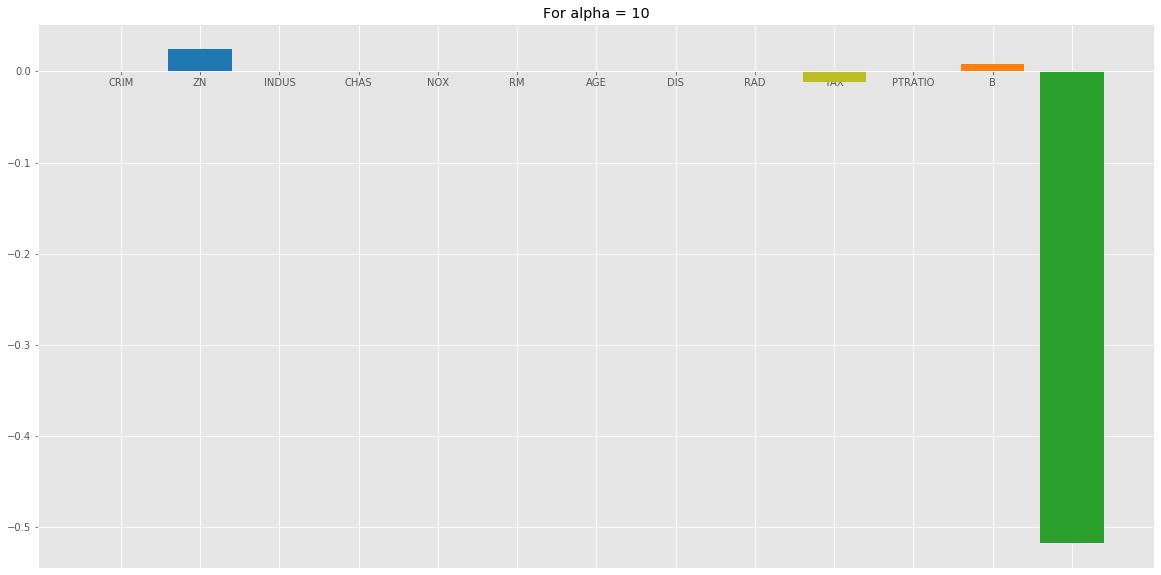

In [27]:
fig, ax = plt.subplots(figsize=(20,10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coeff1['Columns'], lasso_coeff1['Coefficient Estimate'], color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.title('For alpha = 10')
plt.show()

# Elastic Net 

In [29]:
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha = 1)
e_net.fit(X_train, y_train)

y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)
 
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 33.37252207889815


,Columns,Coefficient Estimate
0,CRIM,-0.059319
1,ZN,0.049281
2,INDUS,-0.040434
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.073856
6,AGE,0.012576
7,DIS,-0.781437
8,RAD,0.255510
9,TAX,-0.016499


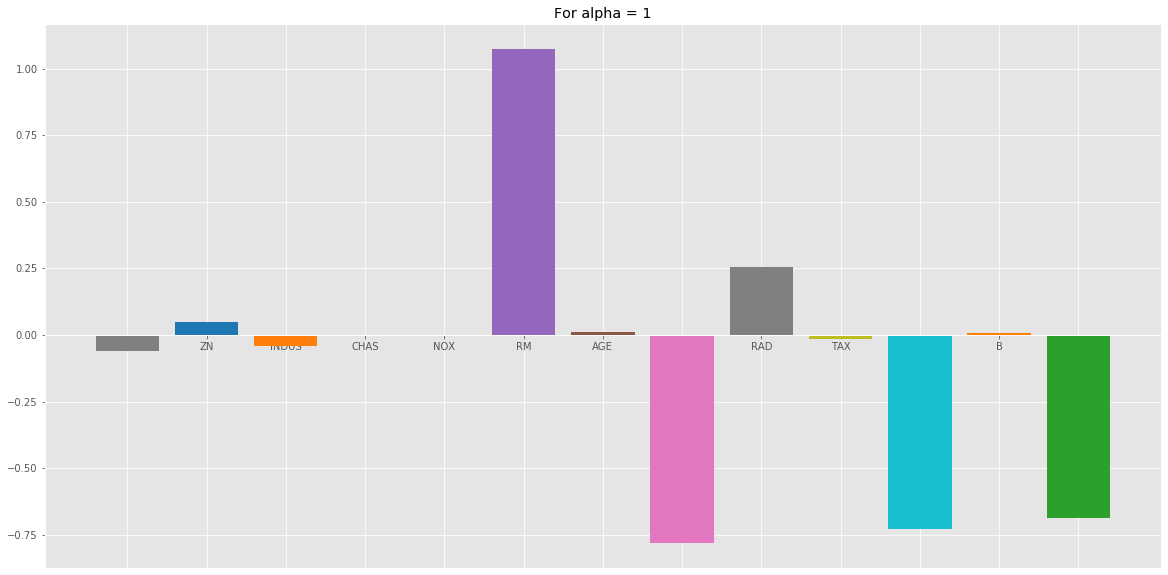

In [30]:
fig, ax = plt.subplots(figsize=(20,10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(e_net_coeff['Columns'], e_net_coeff['Coefficient Estimate'], color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.title('For alpha = 1')
plt.show()

## Conclusion : 
**From the above analysis we can reach the following conclusion about different regularization methods:**
 

* **Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.** 
 
* **Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.** 
 
* **Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.** 
 
* **Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.**

# The End!